In [3]:
import numpy as np
import scipy.stats
import math as m
import matplotlib.pyplot as plt

La de datos de carbon.txt tiene 191 filas y 1 columna. Esta base de datos da las fechas de 191 explosiones en minas de carbón que resultaron en 10 o más muertes. El lapso de tiempo de los datos es desde el 15 de marzo de 1851 hasta el 22 de marzo de 1962.
La fecha del desastre se encuentra en la variable date. La parte entera de la fecha da el año. El día se representa como la fracción del año que había transcurrido en ese día.

# Pregunta 1. #
Suponga que los datos provienen de una proceso de Poisson no-homogeneo. Estime la intensidad del proces

# Definición
Se define un proceso de Poisson no homogéneo a un proceso N(t) en los enteros no negativos, no decreciente y tal que su conteo inicia en cero: $ N(0)=0 $ (al igual que en el proceso homogéneo), la distribución de sus incrementos es $N(t+s)-N(t)~Poiss(\int_{t}^{t+s}{\lambda (t)})$, para $s,t>0$ y cuyos incrementos son independientes.



# Solución
Para empezar, debido a que un proceso de Poisson le concierne únicamente el tamaño de los intervalos, resto el año inicial para tener un vector de "tiempos de falla" registrados en el intervalo de tiempo $[0,112)$. Defino además un vector con el conteo acumulado de fallas y un vector S de tiempos entre fallas $s_1=t_1, s_2=t_2-t_1$, y así $s_i=t_{i}-t_{i-1}$


the intensity function $\lambda(t)$, which is estimated by MLE method in the next sub-section, can be calculated. Based on the density for next arrival time can be derived. However, the numerical estimation is not trivial. We will not discuss how this can be estimated in the numeric form.

Como se comprueba en la literatura consultada, la función de logverosimilitud para la una muestra {x_1,...,x_n} ordenada proveniente de un PPNH está dada por:

$$l(λ) = log(L(λ)) = −\int_0^t{\lambda(x)}dx +\sum_0^n{log λ(x_i)}$$

Hallar esta función $\lambda(t)$ no es práctico a menos que se restrinja a familias específicas de funciones. En la literatura consultada se proponen principalmente funciones compuestas de exponenciales con polinomios y trigonométricas o directamente exponenciales de una serie truncada de Fourier. 
Es decir, para el primer caso: $$ \lambda(t)=exp \sum_{i=0}^n{\alpha_i t^i} +\gamma sen(\omega t+\phi) $$

En el artículo de Leemis citan a su vez un trabajo de Lewis y Shedler (1976), donde se menciona el estimador no paramétrico $$ \hat \lambda(t;n,T)=\frac{1}{b(n)}\sum_{j=1}^n{W(\frac{t-T_j}{n(n)})} $$ donde W es una función de peso no negativa y que integra a 1.

Se cita también a Law (Simulation modeling and analysis), en donde se sugiere dividir el intervalo un subintervalos no superpuestos (una partición de $[0,T)$) de un tamaño adecuado para aproximar la tasa como constante. En el ejemplo, ellos promedian el número de eventos en subintervalos de diez minutos a lo largo de 8 días de observación. En este caso este procedimiento no es posible, pues la muestra no corresponde a un proceso cíclico como lo hace un horario de atención a lo largo de varios días. Para esto, dado un k, genero subintervalos $[t_i,t_{i+1})$ con $i \in \{0,...,k\}$ y $t_i=t_0+i \frac{T}{k}$. Law a su vez, en una versión más reciente, menciona el estimador no paramétrico propuesto por Leemis: $$\hat{\Lambda}(T)=\frac{\sum_{i=1}^d{n_i}}{d}$$ Nuevamente, suponiendo d realizaciones del proceso homogéneo para obtener su promedio. Para un t entre los subintervalos 
$$\hat{\Lambda}(T)=\frac{(i+1)n}{(n+1)}+\frac{}{}$$

En cada uno de estos subintervalos tendremos un conteo de $n_i$ eventos, donde la verosimilitud de observar n eventos en un tiempo $\frac{T}{k}$ 

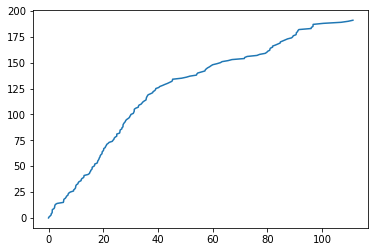

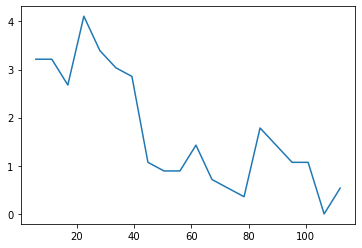

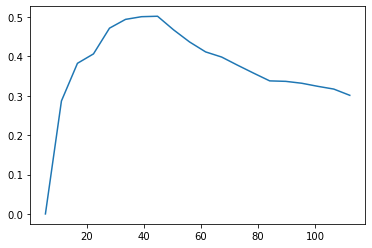

In [31]:
datos=np.loadtxt('carbon.txt')
datos=datos[:,1]

#Los datos van a funcionar como los tiempos (eje x) y el rango funciona como contador
data=np.concatenate(([0],datos-1851))

datos_frec_acum =np.vstack((data,range(len(data)))) #Primera fila:datos, segunda fila: contador N(t)
plt.plot(datos_frec_acum[0,:],datos_frec_acum[1,:])
plt.show()


###Aproximación naive: 
def naive_est(data_tiempos,k):
    """Recibe:
    data_teimpos: un vector de datos con tiempos (asumo datos ordenados)
    k: número de subintervalos"""
    #data=np.sort(data)
    a,b=m.floor(data_tiempos[0]),m.ceil(data_tiempos[-1]) #Los datos son ordenados. b es un poco mayor al máximo de los valores
    delta=(b-a)/k
    vect_lim_sup=[a+i*delta for i in range(1,k+1)]#vector con límites superiores de los subintervalos 
    vect_frec=np.zeros(k)
    vect_cumulative=np.zeros(k)
    contador=0
    #cumulative=0
    for i in range(len(data_tiempos)):
        while data_tiempos[i]>vect_lim_sup[contador]:
            contador+=1
            #vect_feccumulative
        vect_frec[contador]=vect_frec[contador]+1
    vect_tasas=vect_frec/delta

    vect_cumulative=[sum(vect_tasas[:i])/vect_lim_sup[i] for i in range(k)]#[sum(vect_tasas[:i]) for i in range(k) ]
    #print(vect_cumulative)
    return vect_lim_sup,vect_frec,vect_cumulative,vect_tasas
    #Haciendo una partición en k subintervalos
    #Hallo n_i y el ancho h del intervalo. Estimo lambda_i=n_i/h

limites_super,frecuencias,acumulados,tasas=naive_est(data,20)

plt.plot(limites_super,tasas)
plt.show()
plt.plot(limites_super,acumulados)
plt.show()
# plt.plot(datos,range(len(datos))) #Con tiempos originales
# plt.show()
# plt.hist(data,60)
# plt.show()

Podemos ver que la tasa de falla es constante (aumento lineal) hasta el año 40, aproximadamente, luego de lo cual 

# Referencias:

Intensity Estimation for NonHomogeneous Poisson Processes Used to Model Real-Time Medication Event Monitor, Yan Wang. Disponible en: https://d1wqtxts1xzle7.cloudfront.net/36260419/Intensity_Estimation_for_Non-Homogeneous_Poisson_Processes_Used_to_Model_2014-with-cover-page-v2.pdf?Expires=1669244557&Signature=ZEzoKrLfIMUWcfrW0gjW-2zeY2jL-TceWCXtpGkj4VbmuS50n8X8LLHXVftpIscqEKZN2EfE3nEP8Gcg6Y2xp6oZ1kF9imCB5TjSbslnB-1QUdb4I88FQXFdrrO3JLti-FyJezI1m1lVcAt4mCmfwuKoY6jxeS2WymmuDc4ZlTEiKXZDKA32rvI8QEOllwrArIsf86VFqotE-a9gchpzTf3QAnHON68dyYaXU1Gc5KhFzA42RXZjKyMfdW~AWwTC74GHuIZj2iEYg0Nfah2gwhE~bdnVHld1ewXJegqNEieo0tzGu07UluS0Raa8Km9VykBfzwC0YK35XA6h4XoBaw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA


Intensity estimation for Poisson processes. Ludwik Czeslaw Drazek. Disponible en:
https://www1.maths.leeds.ac.uk/~voss/projects/2012-Poisson/Drazek.pdf

Lawrence M. Leemis. Nonparametric Estimation of the Cumulative Intensity Function for a Nonhomogeneous Poisson Process. Management Science Vol. 37, No. 7 (Jul., 1991), pp. 886-900.

